In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [27]:
fp = r"../scraped data"

channels = pd.read_pickle(os.path.join(fp, "channels.pkl"))
uploads = pd.read_pickle(os.path.join(fp, "uploads.pkl"))
videos = pd.read_pickle(os.path.join(fp, "videos.pkl"))

# Daten sichten und bereinigen

## Channels

In [28]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        43 non-null     object
 1   title                     43 non-null     object
 2   custom_url                33 non-null     object
 3   country                   33 non-null     object
 4   description               43 non-null     object
 5   published                 43 non-null     object
 6   thumbnail_default_url     43 non-null     object
 7   thumbnail_default_height  43 non-null     int64 
 8   thumbnail_default_width   43 non-null     int64 
 9   thumbnail_high_url        43 non-null     object
 10  thumbnail_high_height     43 non-null     int64 
 11  thumbnail_high_width      43 non-null     int64 
 12  thumbnail_medium_url      43 non-null     object
 13  thumbnail_medium_height   43 non-null     int64 
 14  thumbnail_medium_width    43

Findings:

* Published in Datum umwandeln
* Alle Channels haben einen high, medium und default Thumbnail
* Subscriber_count
    * Fehlt für einen Kanal
    * In int64 umwandeln
* Video_count in int64 umwandeln
* View_count in int64 umwandeln

In [29]:
channels.describe()

,thumbnail_default_height,thumbnail_default_width,thumbnail_high_height,thumbnail_high_width,thumbnail_medium_height,thumbnail_medium_width
count,43.0,43.0,43.0,43.0,43.0,43.0
mean,88.0,88.0,800.0,800.0,240.0,240.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,88.0,88.0,800.0,800.0,240.0,240.0
25%,88.0,88.0,800.0,800.0,240.0,240.0
50%,88.0,88.0,800.0,800.0,240.0,240.0
75%,88.0,88.0,800.0,800.0,240.0,240.0
max,88.0,88.0,800.0,800.0,240.0,240.0


In [30]:
def transform_channels(df: pd.DataFrame) -> pd.DataFrame:
    # Date string into proper date
    df.published = pd.to_datetime(df.published)
    
    # Convert field type into int64
    fields = ["video_count", "view_count"]
    df.loc[:, fields] = df.loc[:, fields].astype("int64")
    
    # Convert field type into float64
    fields = ["subscriber_count"]
    df.loc[:, fields] = df.loc[:, fields].astype("float64")
    
    df["age_mth"] = (pd.to_datetime("today", utc=True).year - df.published.dt.year) * 12 + (pd.to_datetime("today", utc=True).month - df.published.dt.month)
    
    return df

In [31]:
channels = transform_channels(channels)
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        43 non-null     object             
 1   title                     43 non-null     object             
 2   custom_url                33 non-null     object             
 3   country                   33 non-null     object             
 4   description               43 non-null     object             
 5   published                 43 non-null     datetime64[ns, UTC]
 6   thumbnail_default_url     43 non-null     object             
 7   thumbnail_default_height  43 non-null     int64              
 8   thumbnail_default_width   43 non-null     int64              
 9   thumbnail_high_url        43 non-null     object             
 10  thumbnail_high_height     43 non-null     int64              
 11  thumbnail_high_width 

Welches ist der Kanal ohne Subscriber_count?

In [32]:
print(channels.loc[channels.subscriber_count.isnull(), "title"])

35    The Organic Chemistry Tutor
Name: title, dtype: object


[]

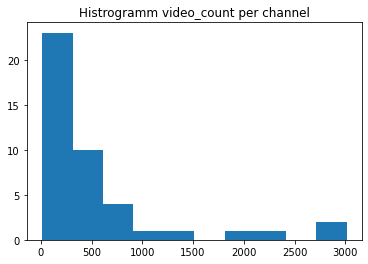

In [33]:
plt.hist(channels.video_count)
plt.title("Histrogramm video_count per channel")
plt.plot()

[]

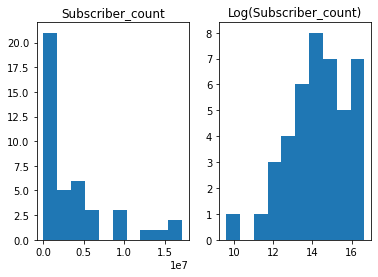

In [34]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(channels.subscriber_count)
axes[0].set_title("Subscriber_count")
axes[1].hist(np.log(channels.subscriber_count))
axes[1].set_title("Log(Subscriber_count)")
plt.plot()

[]

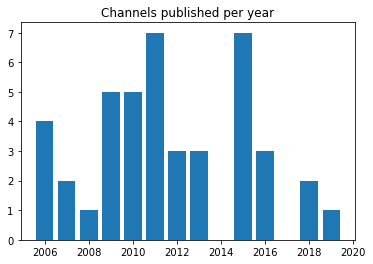

In [35]:
cnt_year = channels.groupby(by=channels.published.dt.year).agg({"id": "count"}).reset_index()
cnt_year.rename(columns={"id": "channel_count"}, inplace=True)
plt.bar(cnt_year.published, cnt_year.channel_count)
plt.title("Channels published per year")
plt.plot()

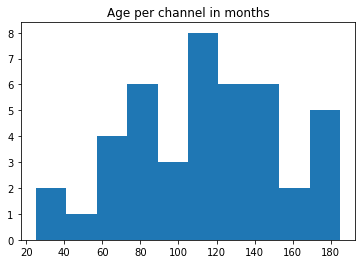

In [36]:
plt.hist(channels.age_mth)
plt.title("Age per channel in months")
plt.show()

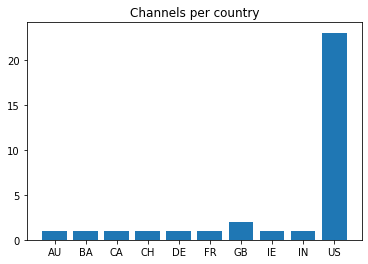

In [37]:
country = channels.groupby(by=["country"], as_index=False).agg({"id": "count"})
country.rename(columns={"id": "channel_count"}, inplace=True)
plt.bar(country.country, country.channel_count)
plt.title("Channels per country")
plt.show()

## Videos

In [38]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21634 non-null  object 
 1   title                      21634 non-null  object 
 2   category_id                21634 non-null  object 
 3   channel_id                 21634 non-null  object 
 4   channel_name               21634 non-null  object 
 5   audio_language             18152 non-null  object 
 6   broadcast                  21634 non-null  object 
 7   published                  21634 non-null  object 
 8   thumbnail_default_url      21634 non-null  object 
 9   thumbnail_default_height   21634 non-null  int64  
 10  thumbnail_default_width    21634 non-null  int64  
 11  thumbnail_high_url         21634 non-null  object 
 12  thumbnail_high_height      21634 non-null  int64  
 13  thumbnail_high_width       21634 non-null  int

Findings:

* Müsste Category_id nicht int64 sein?
* Audio_language fehlt leider bei der Mehrheit der Videos
* Broadcast müsste ein bool sein
* Published in Datum umwandeln
* Alle Videos haben einen high, medium und default Thumbnail
* Comment_count 
    * Fehlt bei wenigen Videos
    * In int64 umwandeln
* Dislike_count 
    * Fehlt bei wenigen Videos
    * In int64 umwandeln
* Favorite_count in int64 umwandeln
* View_count 
    * Fehlt bei wenigen Videos
    * In int64 umwandeln

In [39]:
videos.describe()

,thumbnail_default_height,thumbnail_default_width,thumbnail_high_height,thumbnail_high_width,thumbnail_medium_height,thumbnail_medium_width,thumbnail_maxres_height,thumbnail_maxres_width,thumbnail_standard_height,thumbnail_standard_width
count,21634.0,21634.0,21634.0,21634.0,21634.0,21634.0,18832.0,18832.0,20656.0,20656.0
mean,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0
25%,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0
50%,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0
75%,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0
max,90.0,120.0,360.0,480.0,180.0,320.0,720.0,1280.0,480.0,640.0


Findings:

* Favorite count is 0 for all records!

As per my investigations, the favorite_count seems to have been disabled in the Youtube API within the last year.

In [40]:
def transform_videos(df: pd.DataFrame) -> pd.DataFrame:    
    # Date string into proper date
    df.published = pd.to_datetime(df.published)
    
    # Convert field type to bool
    fields = ["broadcast"]
    df.loc[:, fields] = df.loc[:, fields].astype("bool")
    
    # Convert field type into int64
    fields = ["category_id"]
    df.loc[:, fields] = df.loc[:, fields].astype("int64")
    
    # Convert field type into float64
    fields = ["comment_count", "dislike_count", "like_count", "view_count"]
    df.loc[:, fields] = df.loc[:, fields].astype("float64")
    
    df["published_mth"] = (pd.to_datetime("today", utc=True).year - df.published.dt.year) * 12 + (pd.to_datetime("today", utc=True).month - df.published.dt.month)
    df["title_len"] = df.title.str.len()
    
    df.drop(columns=["favorite_count"], inplace=True)
    
    return df

In [41]:
videos = transform_videos(videos)
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   id                         21634 non-null  object             
 1   title                      21634 non-null  object             
 2   category_id                21634 non-null  int64              
 3   channel_id                 21634 non-null  object             
 4   channel_name               21634 non-null  object             
 5   audio_language             18152 non-null  object             
 6   broadcast                  21634 non-null  bool               
 7   published                  21634 non-null  datetime64[ns, UTC]
 8   thumbnail_default_url      21634 non-null  object             
 9   thumbnail_default_height   21634 non-null  int64              
 10  thumbnail_default_width    21634 non-null  int64              
 11  th

In [45]:
categories = pd.read_csv(os.path.join(fp, "./video_category.csv"), dtype={"id": "int64"})

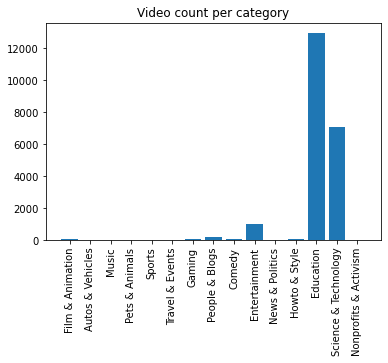

In [46]:
cnt_category = videos.groupby(by=videos.category_id).agg({"id": "count"}).reset_index()
cnt_category.rename(columns={"id": "cat_count"}, inplace=True)
cnt_category = cnt_category.merge(categories, how="left", left_on="category_id", right_on="id")
plt.bar(cnt_category.category, cnt_category.cat_count)
plt.xticks(rotation=90)
plt.title("Video count per category")
plt.show()

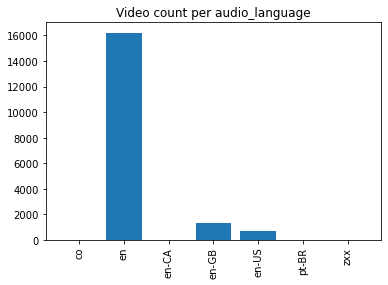

In [47]:
cnt_lang = videos.groupby(by=videos.audio_language).agg({"id": "count"}).reset_index()
cnt_lang.rename(columns={"id": "lang_count"}, inplace=True)
plt.bar(cnt_lang.audio_language, cnt_lang.lang_count)
plt.xticks(rotation=90)
plt.title("Video count per audio_language")
plt.show()

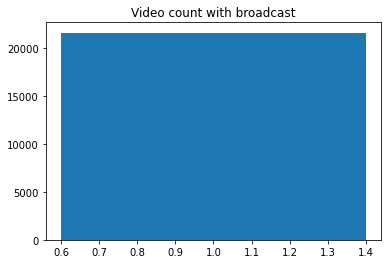

In [48]:
cnt_bc = videos.groupby(by=videos.broadcast).agg({"id": "count"}).reset_index()
cnt_bc.rename(columns={"id": "bc_count"}, inplace=True)
plt.bar(cnt_bc.broadcast, cnt_bc.bc_count)
plt.title("Video count with broadcast")
plt.show()

[]

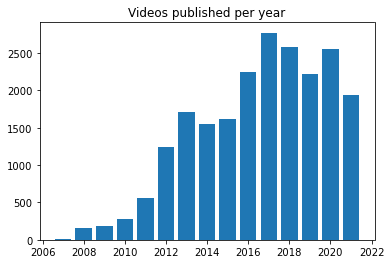

In [49]:
pub_year = videos.groupby(by=videos.published.dt.year).agg({"id": "count"}).reset_index()
pub_year.rename(columns={"id": "pub_count"}, inplace=True)
plt.bar(pub_year.published, pub_year.pub_count)
plt.title("Videos published per year")
plt.plot()

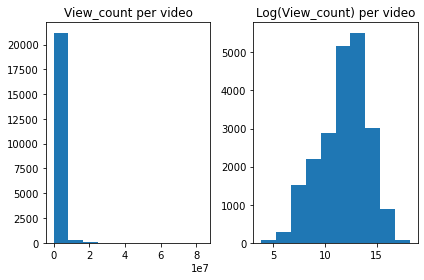

In [50]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(videos.view_count)
axes[0].set_title("View_count per video")
axes[1].hist(np.log(videos.view_count))
axes[1].set_title("Log(View_count) per video")
plt.tight_layout()
plt.show()

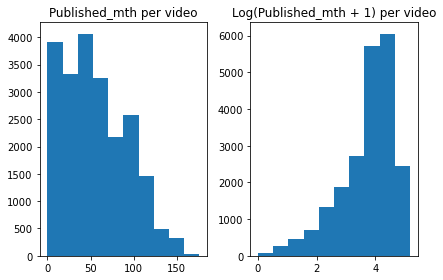

In [51]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(videos.published_mth)
axes[0].set_title("Published_mth per video")
axes[1].hist(np.log(videos.published_mth + 1))
axes[1].set_title("Log(Published_mth + 1) per video")
plt.tight_layout()
plt.show()

In [52]:
no_title = videos.loc[videos.title.str.len() == 0, ["id", "channel_name", "published", "title"]]
print(no_title)

               id channel_name                 published title
5101  4ZJWv6t-PfY       Vsauce 2010-10-13 23:06:17+00:00      
5140  dacojrlGM7Q       Vsauce 2010-07-26 16:28:58+00:00      


Two videos don't have a title

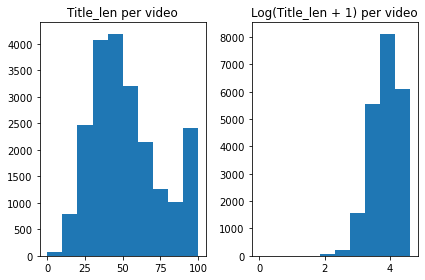

In [53]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(videos.title_len)
axes[0].set_title("Title_len per video")
axes[1].hist(np.log(videos.title_len + 1))
axes[1].set_title("Log(Title_len + 1) per video")
plt.tight_layout()
plt.show()

100 chars is the actual title length limit for google video uploads.

## Combo

In [54]:
combo = videos.merge(channels.loc[:, ["id", "view_count", "subscriber_count", "age_mth"]], how="inner", left_on="channel_id", 
                     right_on="id", suffixes=["_video", "_channel"])
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21634 entries, 0 to 21633
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   id_video                   21634 non-null  object             
 1   title                      21634 non-null  object             
 2   category_id                21634 non-null  int64              
 3   channel_id                 21634 non-null  object             
 4   channel_name               21634 non-null  object             
 5   audio_language             18152 non-null  object             
 6   broadcast                  21634 non-null  bool               
 7   published                  21634 non-null  datetime64[ns, UTC]
 8   thumbnail_default_url      21634 non-null  object             
 9   thumbnail_default_height   21634 non-null  int64              
 10  thumbnail_default_width    21634 non-null  int64              
 11  th

In [55]:
excl = ["id_video", "title", "channel_name", "channel_id", "audio_language", "broadcast", "published", "id_channel"]
df_corr = combo.loc[(combo.channel_name != "The Organic Chemistry Tutor"), [c for c in combo if c not in excl and not c.startswith("thumbnail")]]
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19356 entries, 0 to 21633
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_id         19356 non-null  int64  
 1   comment_count       19190 non-null  float64
 2   like_count          19318 non-null  float64
 3   dislike_count       19318 non-null  float64
 4   view_count_video    19327 non-null  float64
 5   published_mth       19356 non-null  int64  
 6   title_len           19356 non-null  int64  
 7   view_count_channel  19356 non-null  int64  
 8   subscriber_count    19356 non-null  float64
 9   age_mth             19356 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


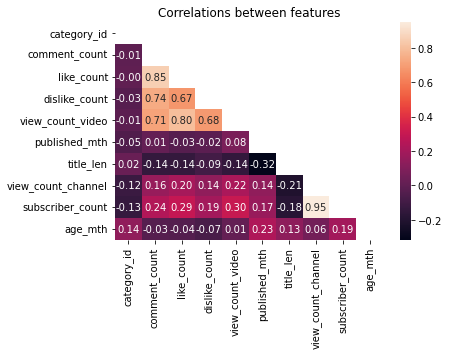

In [56]:
corr = df_corr.corr()
m = np.triu(corr)
sb.heatmap(df_corr.corr(), mask=m, annot=True, fmt="0.2f")
plt.title("Correlations between features")
plt.show()

Findings:

* Highly negative correlations:
    * Video titles seem to have become longer over recent years
    * Videos with longer titles seem to get less comments, lower view_counts
    * More dislikes means more comments but the same applies for likes
    * More subscribers means more view_counts for the channels -> subscribers are active recurring viewers

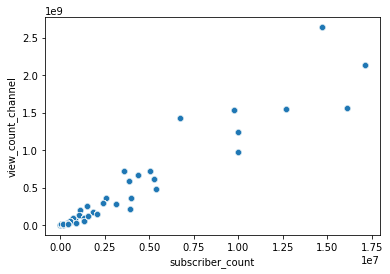

In [57]:
sb.scatterplot(x="subscriber_count", y="view_count_channel", data=combo)
plt.show()

Linear relationship between view_count of the channel and the channel's subscriber_count

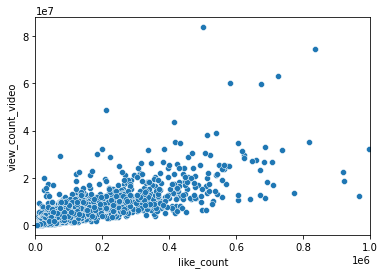

In [58]:
sb.scatterplot(x="like_count", y="view_count_video", data=combo)
plt.xlim(0,1e6)
plt.show()

Which are the videos with super high view_count?

In [59]:
combo.loc[combo.view_count_video >= 6e7, ["title", "channel_name", "view_count_video", "like_count"]].head()

,title,channel_name,view_count_video,like_count
142,TATTOOING Close Up (in Slow Motion) - Smarter ...,SmarterEveryDay,83671559.0,499547.0
3109,20 Amazing Science Experiments and Optical Ill...,Home Science,60186749.0,580595.0
3628,"Why Are 96,000,000 Black Balls on This Reservoir?",Veritasium,74579580.0,834096.0
17179,"Do You Hear ""Yanny"" or ""Laurel""? (SOLVED with ...",AsapSCIENCE,63147905.0,722894.0


Which are the videos with lots of likes but not so many views?

In [60]:
combo.loc[(combo.view_count_video < 4e7) & (combo.like_count >= 0.8e6), 
          ["title", "channel_name", "view_count_video", "like_count"]].head()

,title,channel_name,view_count_video,like_count
4786,Mirror Magic #shorts,Vsauce,12255507.0,964817.0
4843,The Banach–Tarski Paradox,Vsauce,35194652.0,817707.0
13378,The Coronavirus Explained & What You Should Do,Kurzgesagt – In a Nutshell,32042676.0,997581.0
13391,The Egg - A Short Story,Kurzgesagt – In a Nutshell,22874110.0,1556510.0
13399,What If We Detonated All Nuclear Bombs at Once?,Kurzgesagt – In a Nutshell,22639806.0,918647.0


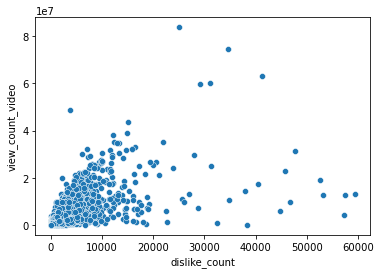

In [61]:
sb.scatterplot(x="dislike_count", y="view_count_video", data=combo)
# plt.xlim(0,1e6)
plt.show()

Videos with lots of views but few dislikes?

In [62]:
combo.loc[(combo.view_count_video >= 4e7) & (combo.dislike_count < 5000), 
          ["title", "channel_name", "view_count_video", "dislike_count"]].head()

,title,channel_name,view_count_video,dislike_count
3709,Backspin Basketball Flies Off Dam,Veritasium,48860770.0,3742.0


Videos with few views but many dislikes?

In [63]:
combo.loc[(combo.view_count_video < 2e7) & (combo.dislike_count > 50000), 
          ["title", "channel_name", "view_count_video", "dislike_count"]].head()

,title,channel_name,view_count_video,dislike_count
13415,3 Arguments Why Marijuana Should Stay Illegal ...,Kurzgesagt – In a Nutshell,13205719.0,59394.0
16096,Warning: DO NOT TRY—Seeing How Close I Can Get...,The Action Lab,12560777.0,57411.0
16116,What Does a 4D Ball Look Like in Real Life? Am...,The Action Lab,12882496.0,53146.0
16198,How Much Weight Can a Fly Actually Lift? Exper...,The Action Lab,19251618.0,52569.0
17237,Can Math Prove God's Existence?,AsapSCIENCE,4312421.0,57292.0


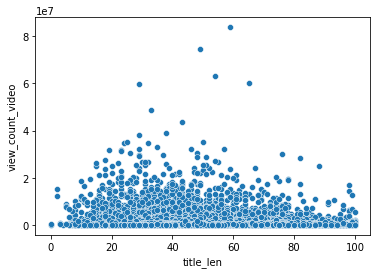

In [64]:
sb.scatterplot(x="title_len", y="view_count_video", data=combo)
plt.show()

Not a very obvious relationship. Maybe an increase in views up to a certail title length?

# A look into possible target variable definitions

Since more subscribers on a channel results in more impressions and therefore more views, view_count shall be normalised using subscriber_count.

In [65]:
combo["view_count_norm"] = combo.view_count_video / combo.subscriber_count

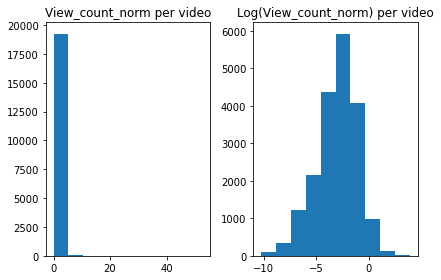

In [66]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(combo.view_count_norm)
axes[0].set_title("View_count_norm per video")
axes[1].hist(np.log(combo.view_count_norm))
axes[1].set_title("Log(View_count_norm) per video")
plt.tight_layout()
plt.show()

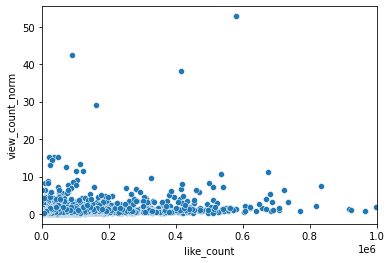

Correlation: 0.34


In [67]:
sb.scatterplot(x="like_count", y="view_count_norm", data=combo)
plt.xlim(0,1e6)
plt.show()
print("Correlation: {:4.2f}".format(combo.view_count_norm.corr(combo.like_count)))

The number of likes seems to have little correlation with the normalised view_count.

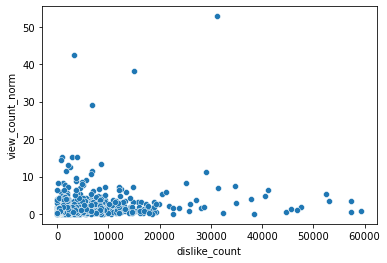

Correlation: 0.38


In [68]:
sb.scatterplot(x="dislike_count", y="view_count_norm", data=combo)
# plt.xlim(0,1e6)
plt.show()
print("Correlation: {:4.2f}".format(combo.view_count_norm.corr(combo.dislike_count)))

The number of dislikes seems to have little correlation with the normalised view_count.

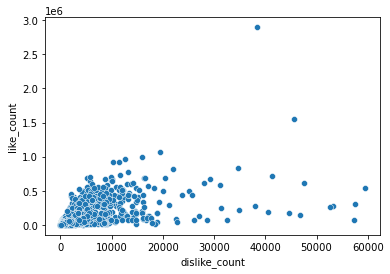

Correlation: 0.68


In [70]:
sb.scatterplot(x="dislike_count", y="like_count", data=combo)
# plt.xlim(0,1e6)
plt.show()
print("Correlation: {:4.2f}".format(combo.like_count.corr(combo.dislike_count)))

Likes and dislikes are positively correlated.

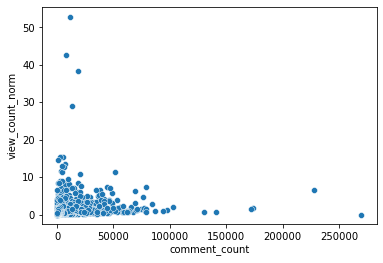

Correlation: 0.28


In [71]:
sb.scatterplot(x="comment_count", y="view_count_norm", data=combo)
# plt.xlim(0,1e6)
plt.show()
print("Correlation: {:4.2f}".format(combo.view_count_norm.corr(combo.comment_count)))

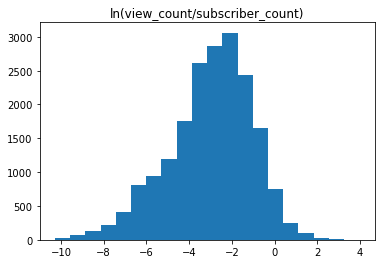

In [74]:
plt.hist(np.log(combo.view_count_video / combo.subscriber_count), bins=20)
plt.title("ln(view_count/subscriber_count)")
plt.show()